In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/MLdatasets

diamonds.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [6]:
#reading and writinng the data
diamond_df=pd.read_csv('/content/drive/MyDrive/MLdatasets/diamonds.csv')
diamond_df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
diamond_df.drop(['Unnamed: 0'], axis=1,inplace=True)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
diamond_df.shape

(53940, 10)

In [10]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
!pip install ydata-profiling #basic data visualization-data statistical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=54317f48a3981a172c54c23a9063b9c2ec667c6ba30151e5186fdc8a42628ca6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [14]:
from ydata_profiling import ProfileReport
profile=ProfileReport(diamond_df,title="Profiling Report")

In [16]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

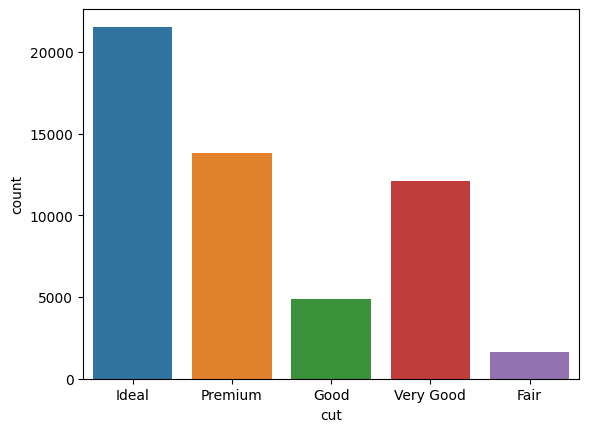

In [17]:
sns.countplot(data=diamond_df,x='cut')
plt.show()

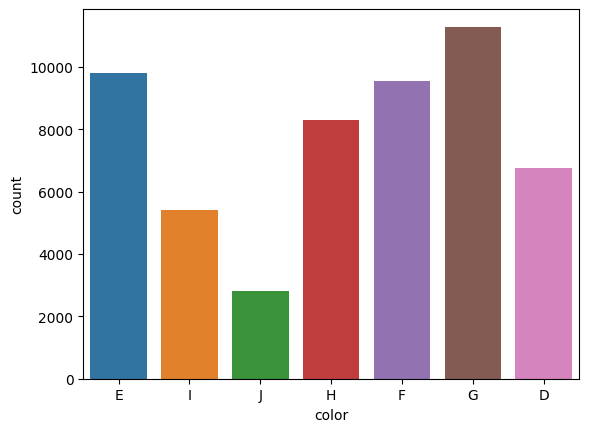

In [18]:
sns.countplot(data=diamond_df,x='color')
plt.show()

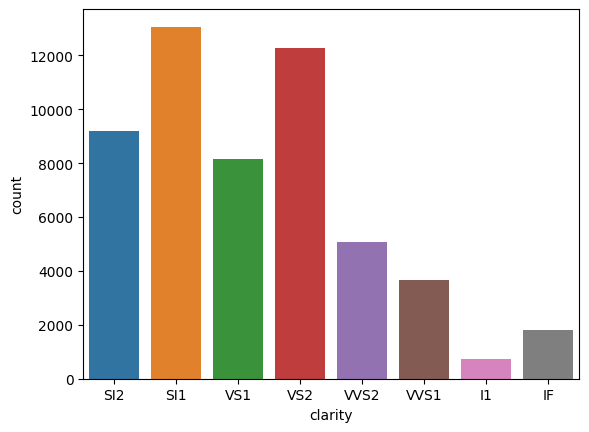

In [19]:
sns.countplot(data=diamond_df,x='clarity')
plt.show()

In [20]:
ab=list(diamond_df['cut'].unique())
ab

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [21]:
cut_mapping={'Fair':0, 'Good':1, ' Very Good':2, 'Premium':3, 'Ideal':4}
diamond_df.cut=diamond_df.cut.map(cut_mapping)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
color_mapping={'E' :0, 'I':1, 'J':2, 'H':3, 'F':4, 'G':5 ,'D':6}
diamond_df.color=diamond_df.color.map(color_mapping)

In [23]:
list(diamond_df['clarity'].unique())

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [24]:
clarity_mapping={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
diamond_df.clarity=diamond_df.clarity.map(clarity_mapping)

In [25]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,0,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,0,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,0,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,2,1,63.3,58.0,335,4.34,4.35,2.75


In [26]:
diamond_df[diamond_df["x"]==0].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [27]:
diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

In [28]:
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

In [29]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51130 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    51130 non-null  float64
 1   cut      39446 non-null  float64
 2   color    51130 non-null  int64  
 3   clarity  51130 non-null  int64  
 4   depth    51130 non-null  float64
 5   table    51130 non-null  float64
 6   price    51130 non-null  int64  
 7   x        51130 non-null  float64
 8   y        51130 non-null  float64
 9   z        51130 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.3 MB


In [30]:
model_df=diamond_df.copy()

In [31]:
X=model_df.drop(['price'],axis=1)
Y=model_df['price']

In [32]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [33]:
Y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [47]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40904, 9), (10226, 9), (40904,), (10226,))

In [48]:
xgb1 = XGBRegressor()

history = xgb1.fit(X_train,Y_train,verbose=True)

print("MAE:", mean_absolute_error(Y_test, xgb1.predict(X_test)))
print("MSE:", mean_squared_error(Y_test, xgb1.predict(X_test)))

MAE: 236.47109647825835
MSE: 197772.87646058056


In [44]:
xgb1.save_model('xgb_model.json')

In [45]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import joblib
# save the model to a file
joblib.dump(xgb1, 'xgb_grid.joblib')

['xgb_grid.joblib']

In [52]:
from google.colab import files
files.download('xgb_grid.joblib')
files.download('xgb_model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>